 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="http://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Output-FileName" data-toc-modified-id="Output-FileName-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Output FileName</a></span></li><li><span><a href="http://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Historical-Data" data-toc-modified-id="Historical-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Historical Data</a></span></li><li><span><a href="http://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Realtime-Data" data-toc-modified-id="Realtime-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Realtime Data</a></span></li><li><span><a href="http://localhost:8889/notebooks/BackRiverFlowFiles-USA.ipynb#Concatenate-Historical-and-Real" data-toc-modified-id="Concatenate-Historical-and-Real-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Concatenate Historical and Real</a></span></li></ul></div>

Process US downloaded files to produce river files

# Imports #

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Output FileName #

In [31]:
filename = 'Snohomish_Munroe_flow'

# Get Data #

In [35]:
skiprows = 31
if filename == 'Deschutes':
    skiprows = 32
print (skiprows)
data = pd.read_csv('hydro_files/snohomish_2022_12_03.rdb', skiprows=skiprows, sep='\t', 
                   names=['agency', 'site', 'datetime', 'flow', 'comment'],
                  infer_datetime_format=True)
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')
data = data.drop(['agency', 'site'], axis=1)
data.flow = data.flow * 0.0283168   # convert to m3/s
data[:5]

31


,flow,comment
datetime,,
1970-01-01,149.229536,A
1970-01-02,138.185984,A
1970-01-03,130.823616,A
1970-01-04,123.178080,A
1970-01-05,113.833536,A


In [36]:
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data[:5]

,flow,comment,year,month,day
datetime,,,,,
1970-01-01,149.229536,A,1970,1,1
1970-01-02,138.185984,A,1970,1,2
1970-01-03,130.823616,A,1970,1,3
1970-01-04,123.178080,A,1970,1,4
1970-01-05,113.833536,A,1970,1,5


In [37]:
outdata = pd.DataFrame({'year': data.year, 
                        'month': data.month, 
                        'day': data.day,
                        'discharge': data.flow, 
                        'comment': data.comment}, columns=['year', 'month', 'day', 
                                                       'discharge', 'comment'])

In [38]:
outdata[-5:]

,year,month,day,discharge,comment
datetime,,,,,
2022-11-28,2022,11,28,232.480928,P
2022-11-29,2022,11,29,185.475040,P
2022-11-30,2022,11,30,169.617632,P
2022-12-01,2022,12,1,158.857248,P
2022-12-02,2022,12,2,142.433504,P


In [39]:
outdata.to_csv(path_or_buf=filename, sep=' ', 
               columns=['year', 'month', 'day', 'discharge', 'comment'], 
               header=False, index=False, float_format="%.6E")

In [40]:
alltogether = pd.read_csv(filename, header=None, index_col=False, sep=' ', 
                          names=['Year', 'Month', 'Day', 'Flow'])

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [41]:
alltogether.index = pd.to_datetime(alltogether.drop(['Flow'], axis=1))

<AxesSubplot:>

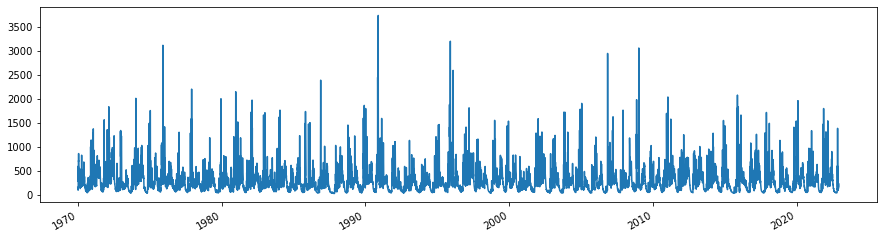

In [42]:
alltogether.Flow.plot(figsize=(15,4))#xlim=(datetime.date(2007, 1, 1), datetime.date(2019, 4, 5)));